# Task2 **Exploratory Data Analysis**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
# load dataset
from google.colab import drive
drive.mount('/content/drive')
file_path= '/content/drive/MyDrive/ML_datasets/Titanic-Dataset.csv'
df= pd.read_csv(file_path)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# TO know the number of passangers travelling
df.shape

(891, 12)

1.  generating summary stats

In [8]:
df.describe(include='all')   # gives summary statistics for the entire dataset: including object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [11]:
df.describe()   # gives summary statistics for numerical columns : incldued count, mean, std , min ,max

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.describe(include='object')  # gives the count ,  no. of unique values , top(most freq value) and freq (amount of times it appeared) for oject only

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [13]:
# if we want to show only median
df.median(numeric_only=True)

,0
PassengerId,446.0000
Survived,0.0000
Pclass,3.0000
Age,28.0000
SibSp,0.0000
Parch,0.0000
Fare,14.4542


In [14]:
df.std(numeric_only=True)

,0
PassengerId,257.353842
Survived,0.486592
Pclass,0.836071
Age,14.526497
SibSp,1.102743
Parch,0.806057
Fare,49.693429


2 : Creating Histograms and Boxplots for Numeric features

a. Histogram

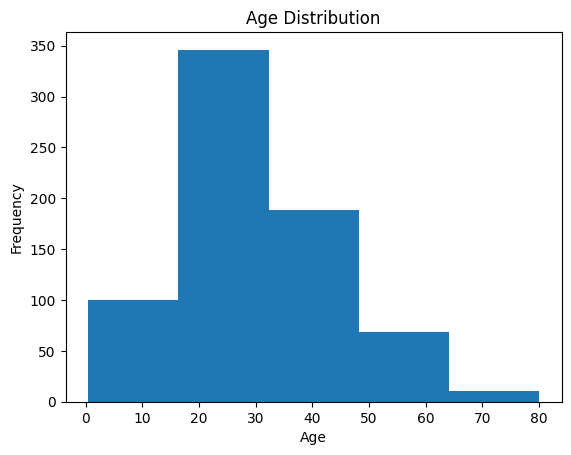

In [17]:
# for age
plt.hist(df['Age'] , bins=5)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

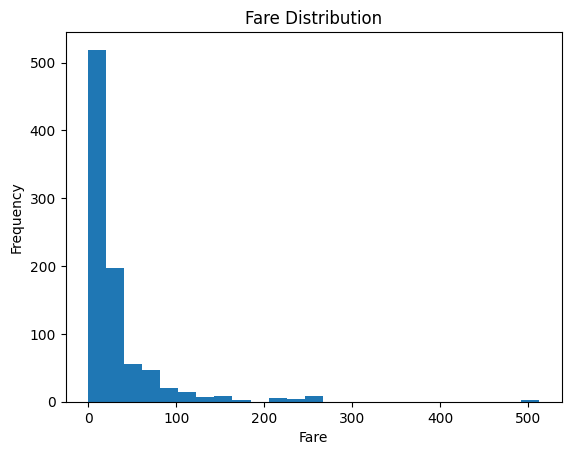

In [24]:
# for fare
plt.hist(df['Fare'] , bins=25)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

b. Distplot

/tmp/ipython-input-28-3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

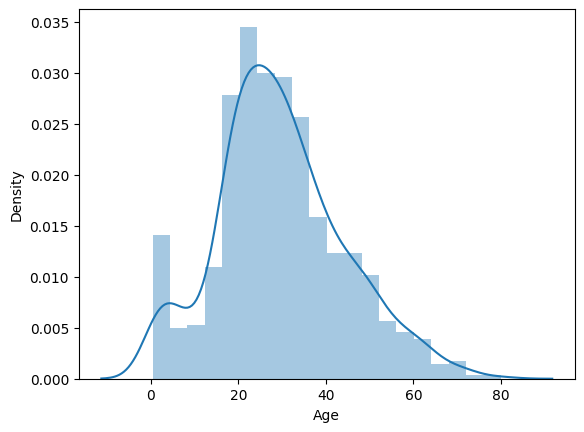

In [28]:
sns.distplot(df['Age'])

/tmp/ipython-input-26-2981806563.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

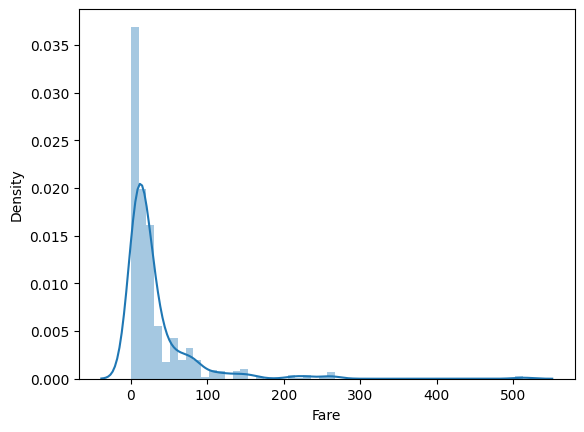

In [26]:
# for fare
sns.distplot(df['Fare'])

c. Boxplot

<Axes: ylabel='Age'>

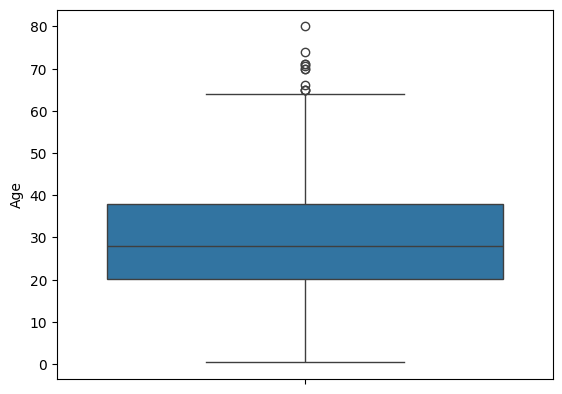

In [30]:
# for age
sns.boxplot(df['Age'])


<Axes: ylabel='Fare'>

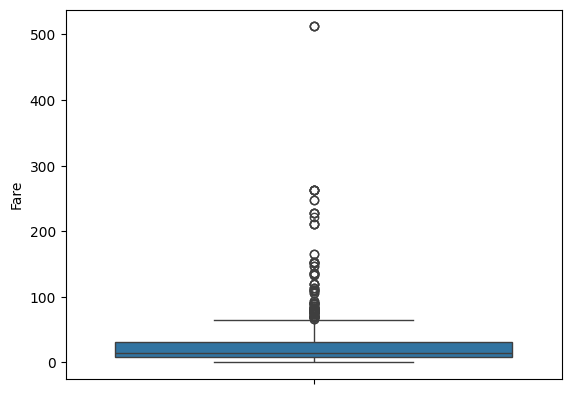

In [31]:
# for fare
sns.boxplot(df['Fare'])

3. Use pairplot or correlation matrix for feature relationships

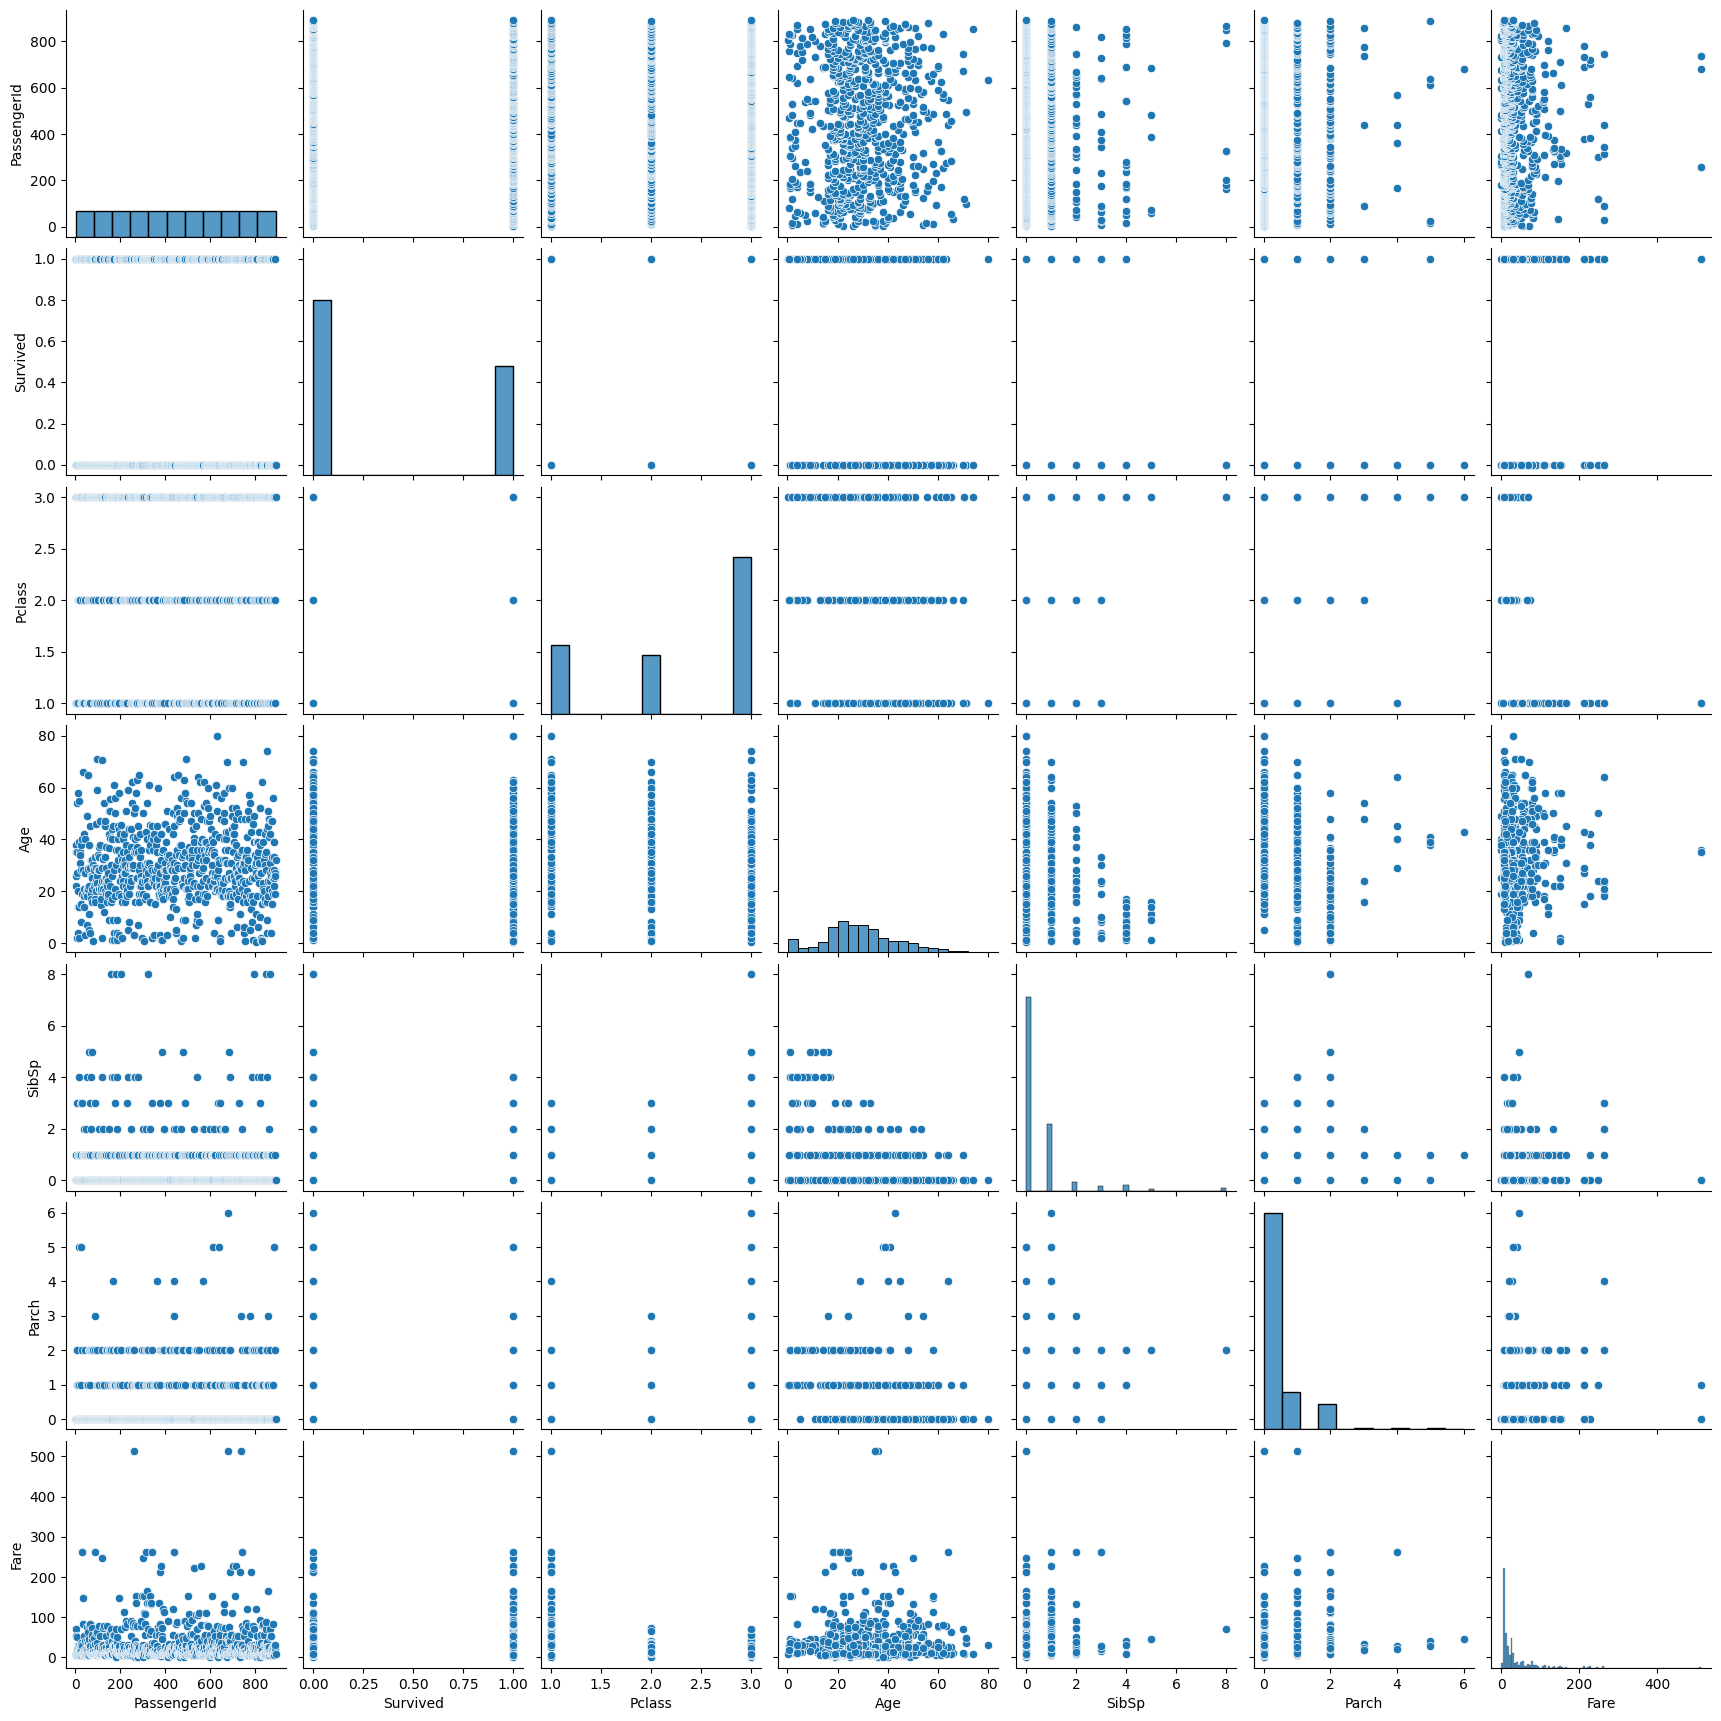

In [32]:
sns.pairplot(df)

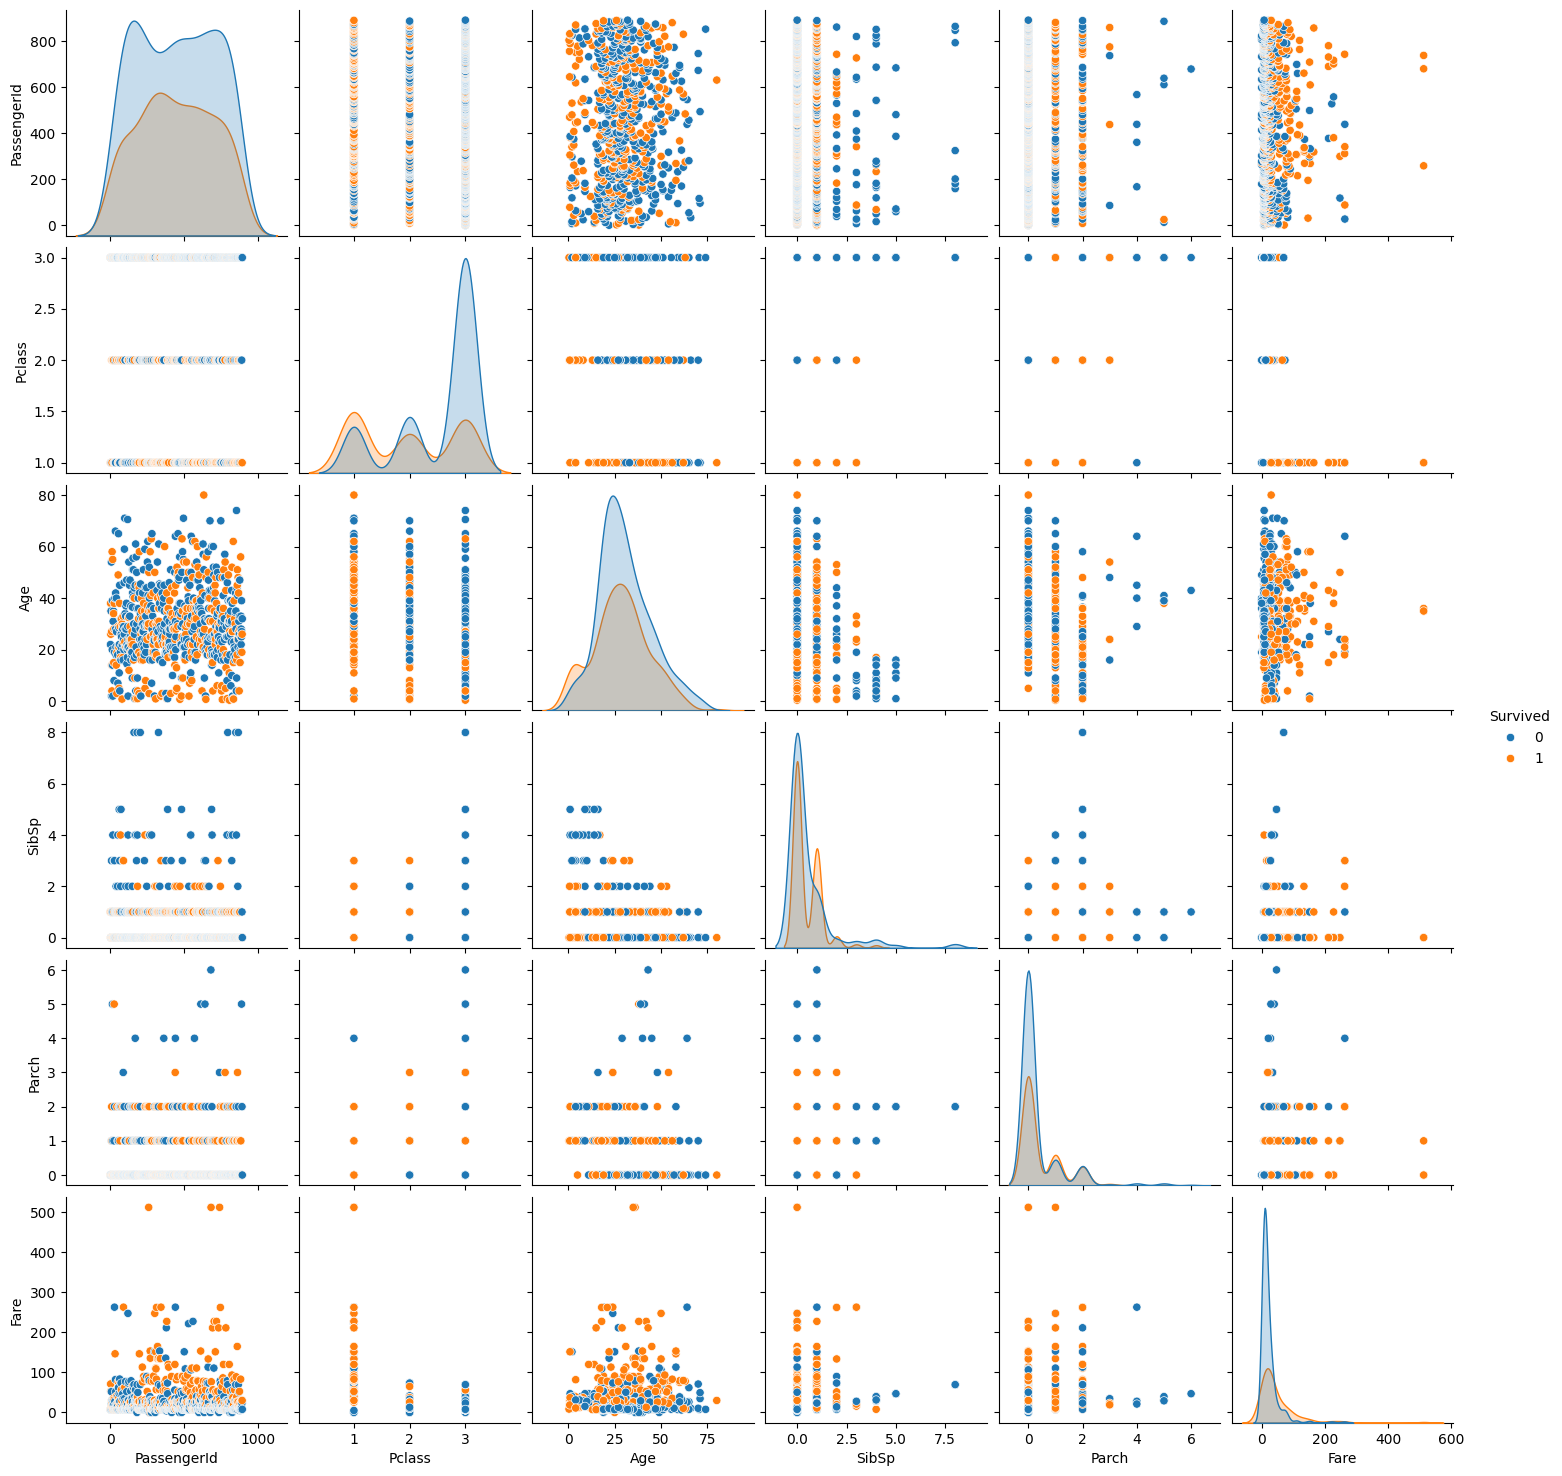

In [34]:
# on the basis of 'Survived'
sns.pairplot(df, hue='Survived')

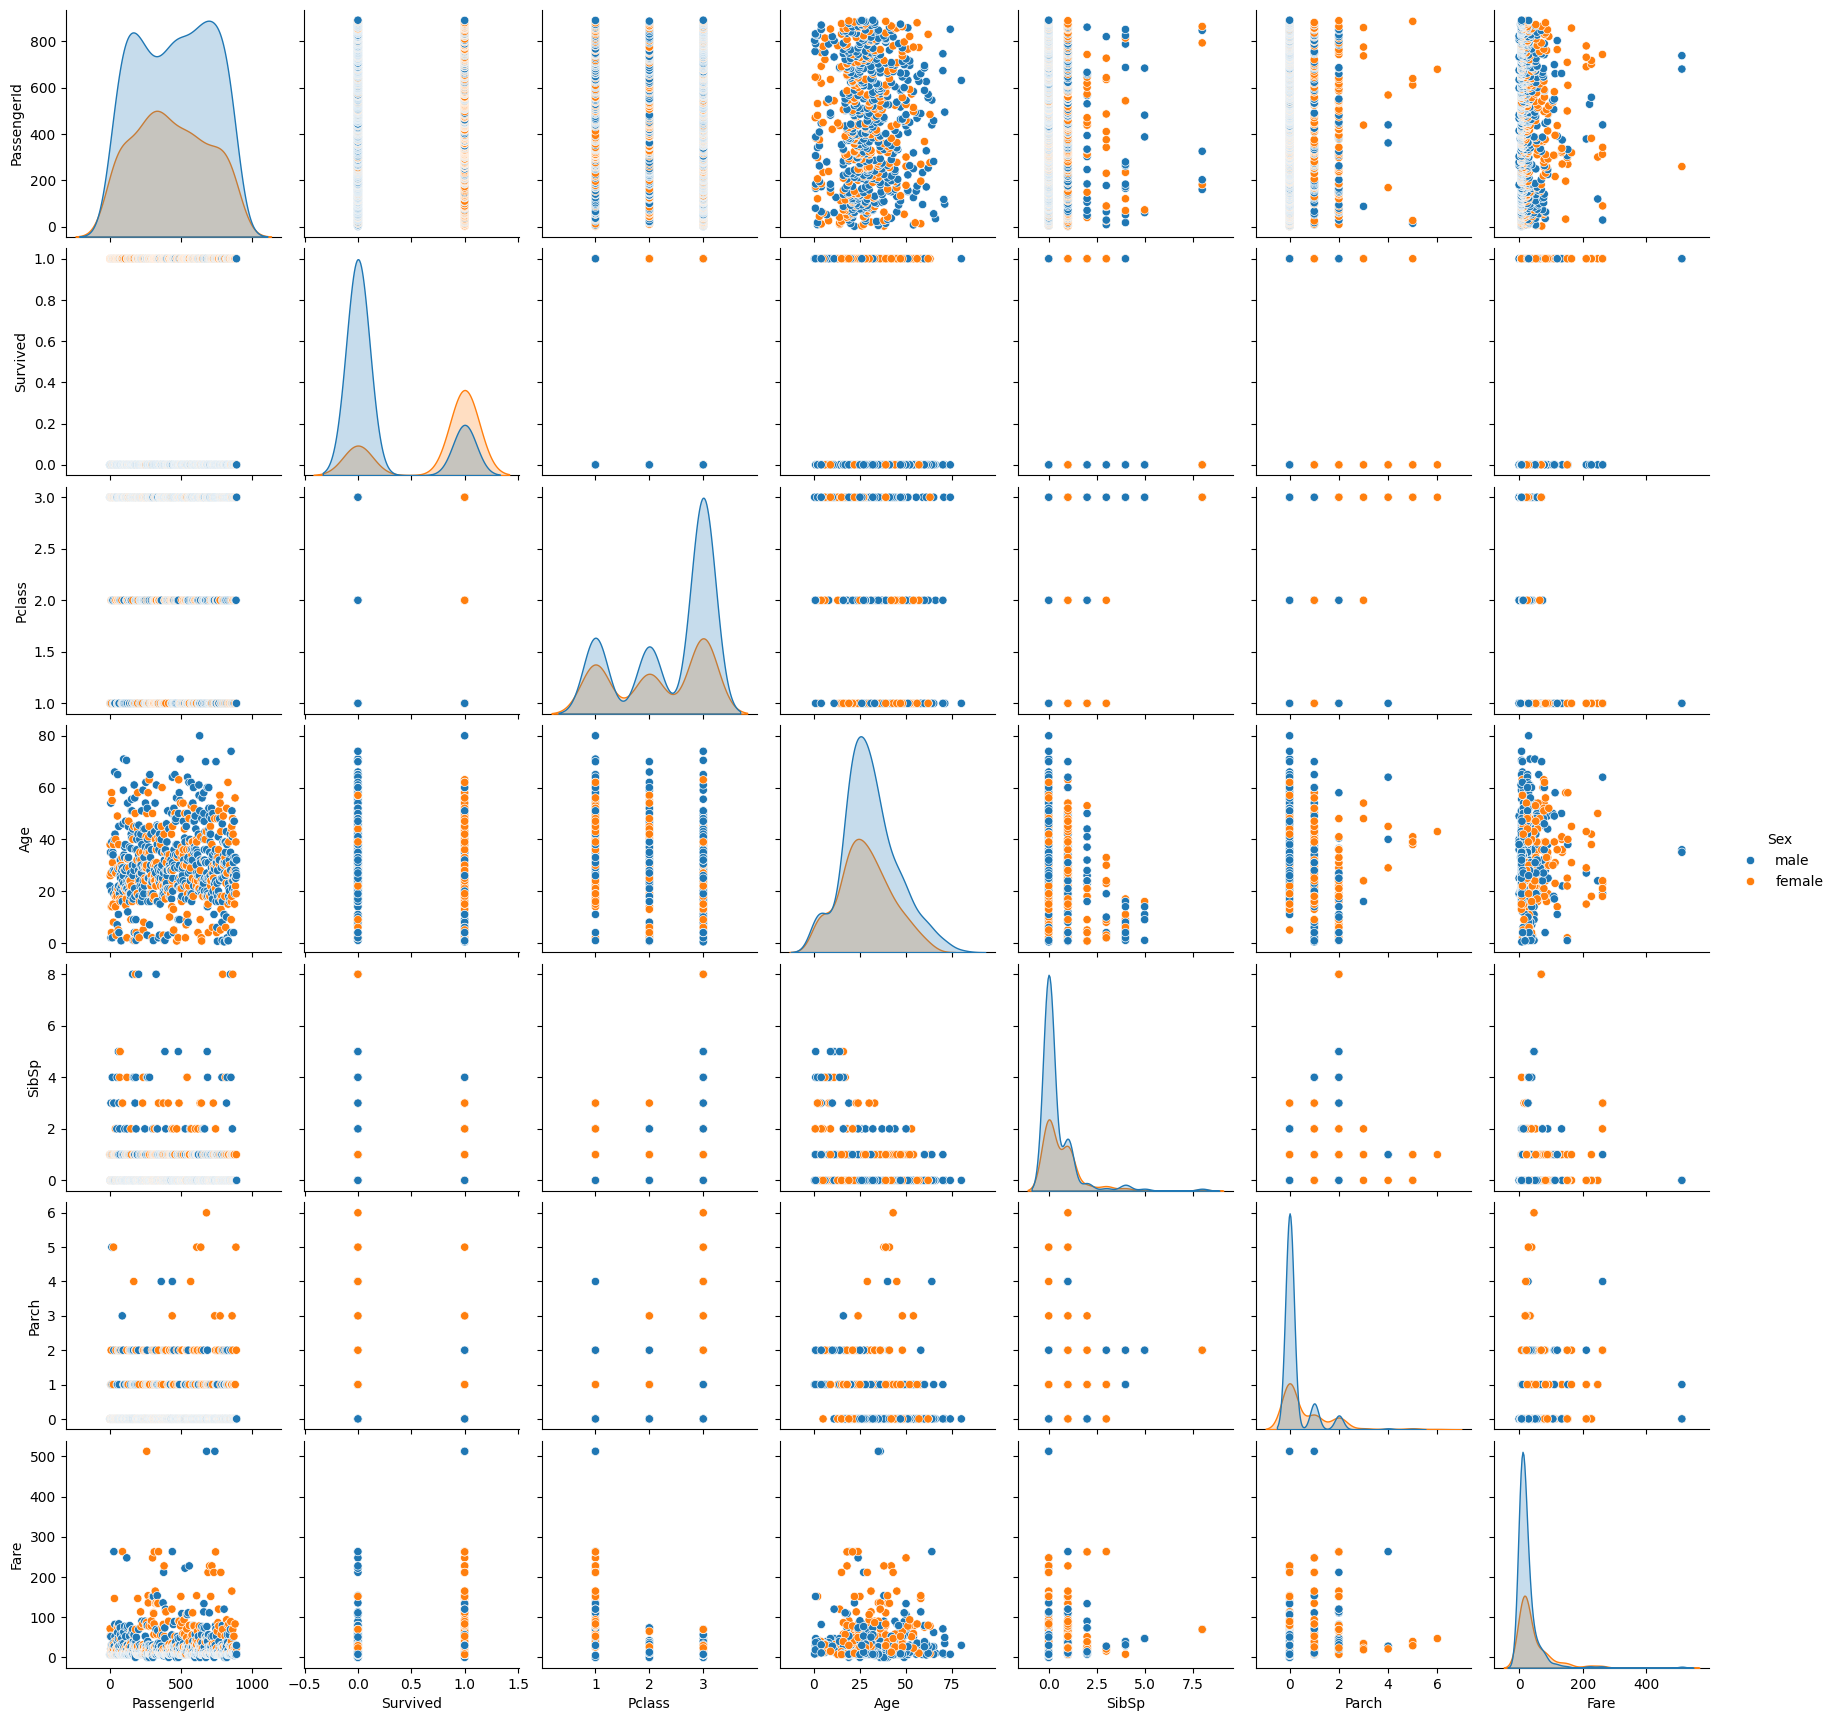

In [38]:
# on the basis w/ relationto 'Sex'
sns.pairplot(df, hue='Sex')

In [39]:
# correlation matrix
correlation_matrix = df.corr(numeric_only=True)
display(correlation_matrix)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


4. To identify patterns , trends , or anomalies in the data

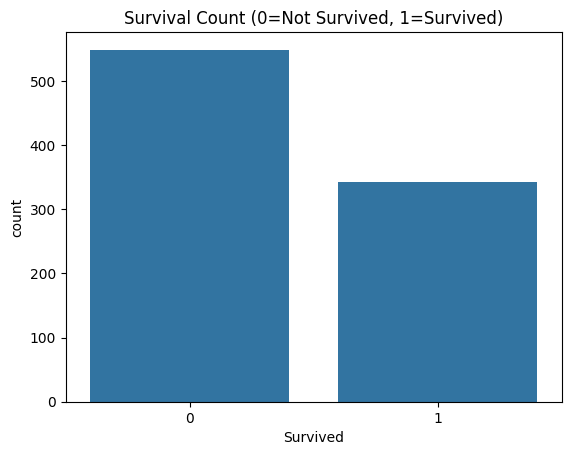

In [40]:
# frequency count and plotting basedon freq
# COUNTPLOT


sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0=Not Survived, 1=Survived)')
plt.show()

In [41]:
df['Survived'].value_counts()
print(" 549 died and 342 survived " )

 549 died and 342 survived 


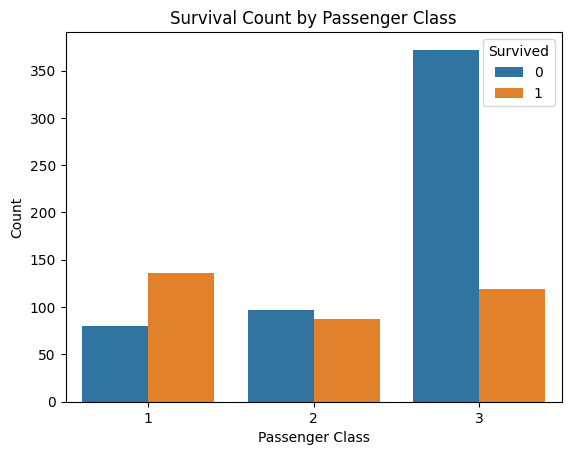

In [42]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

In [43]:
print(" Passanges with class 1 had a higher rate of survival")

 Passanges with class 1 had a higher rate of survival


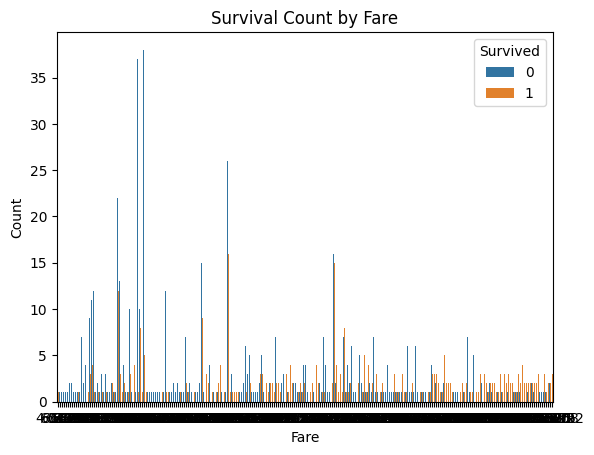

In [44]:
sns.countplot(x='Fare', hue='Survived', data=df)
plt.title('Survival Count by Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

In [45]:
print(" Higher fares had a higher rate of survival")

 Higher fares had a higher rate of survival


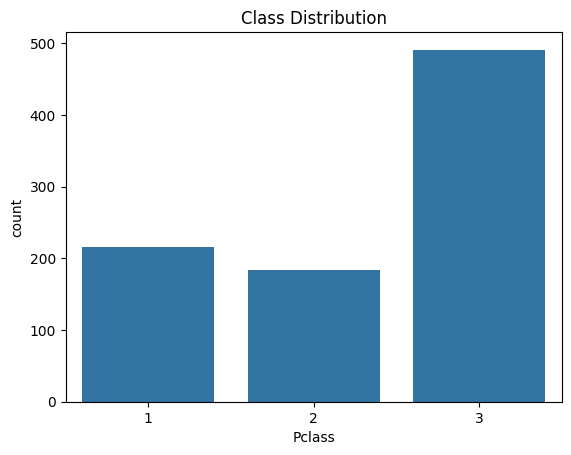

In [46]:
sns.countplot(x= "Pclass", data=df)
plt.title('Class Distribution')
plt.show()

print(" More people travelled on 3rd class ")

In [48]:
print(" More people travelled on 3rd class ")


 More people travelled on 3rd class 


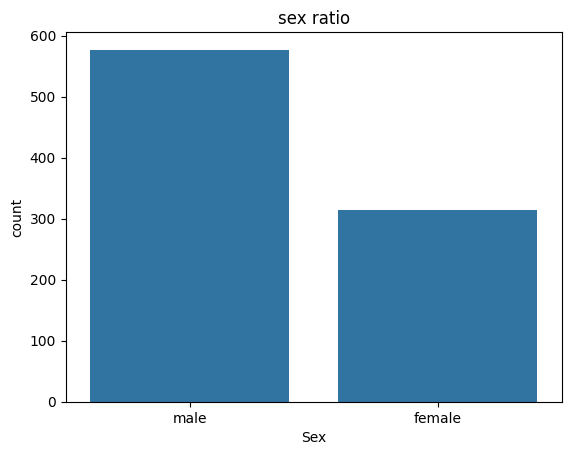

In [49]:
sns.countplot(x= "Sex", data=df)
plt.title('sex ratio')
plt.show()  # shows male were on higher number


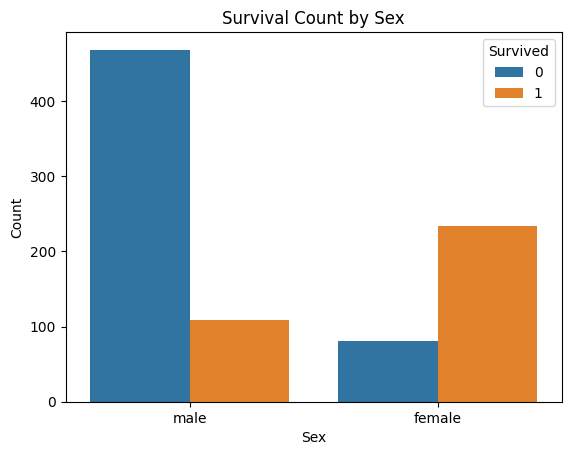

In [50]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [51]:
print( " women had a higher rate of survival")

 women had a higher rate of survival


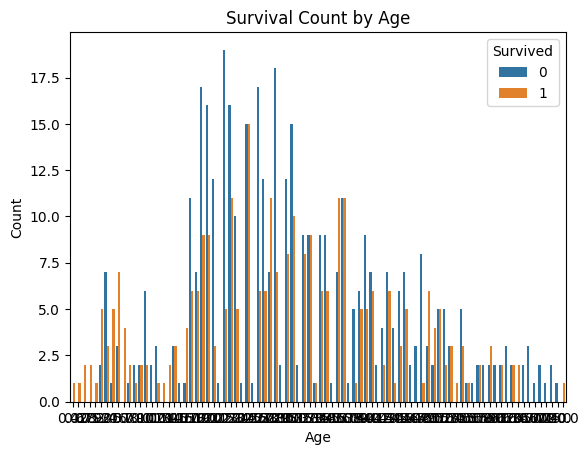

In [52]:
sns.countplot(x='Age', hue='Survived', data=df)
plt.title('Survival Count by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [53]:
print("  Children had a higher rate of survival")

  Children had a higher rate of survival


PIECHART FOR PERCENTAGE

<Axes: ylabel='count'>

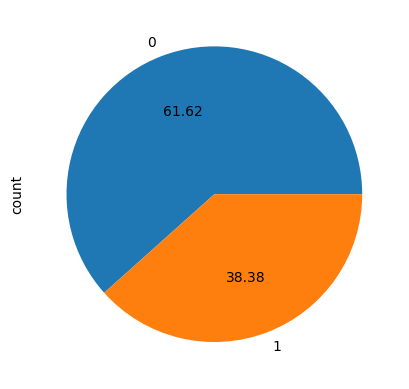

In [54]:
from enum import auto
df['Survived'].value_counts().plot(kind='pie',autopct='%.2f')

In [55]:
print("61.62% died and only 38.38 % survived")

61.62% died and only 38.38 % survived


<Axes: ylabel='Cabin'>

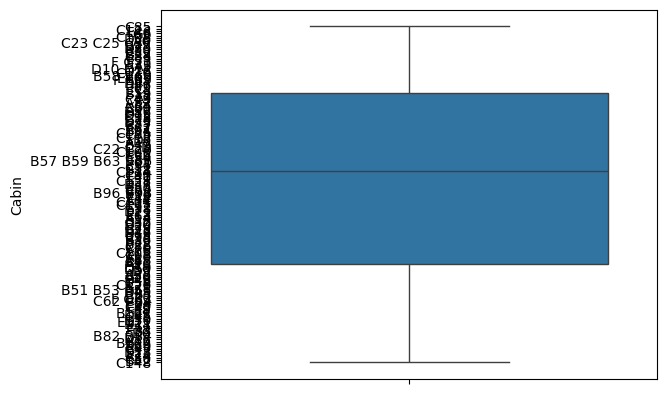

In [57]:
sns.boxplot(df['Cabin'])  # has missing values in huge number


#  Key Observations :
 Age group 20-25 were the most in numbers.

 Most people didnt survive, 549 died and 342 survived.

 for 'Fare' the calculated maximum is around 65 and all the values above that are considered as potential outliers by boxplot.

 Passanges with class 1 had a higher rate of survival.

 Higher fares had a higher rate of survival.

 More people travelled on 3rd class.

 More number of males were traveling.

 Women had a higher rate of survival.
 Children had a higher rate of survival.

 61.62% died and only 38.38 % survived.

 Possible Outliers were visible in the columns 'Age' and 'Fare' , on looking at the column ' Cabin ' which has a lot of missing values , it becomes inconsitent to be working with and is a an anomaly.

 By performing EDA on the Titanic dataset we can say the survival rate were mainly affected by these factors : Pclass , Sex , Age and Fare.

Moreover ,  Possible Outliers were visible in the columns 'Age' and 'Fare' , on looking at the column ' Cabin '  which has a lot of missing values , it becomes inconsitent to be working with and is a an anomaly.

